In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder

# escolhi apenas trabalhar com a marca de veículos BMW
df = pd.read_csv('./dataset/mushrooms.csv')

classification = ['edible', 'poisonous']

# tratando as colunas de texto para int
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])


 shape of X:  (8124, 22)
shape of y (8124,)

 ring-type


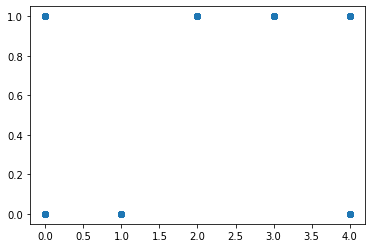


 spore-print-color


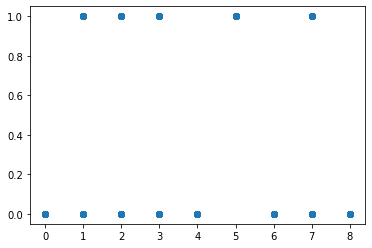


 population


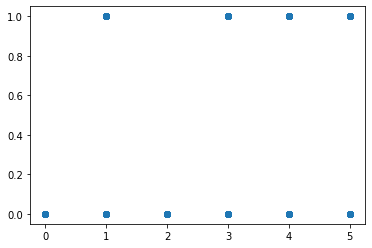


 habitat


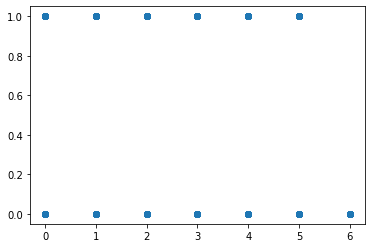

In [7]:
# X representa todas as colunas exceto price e model
X = df.drop(columns=["class"])
y = df["class"]

print("\n", "shape of X: ", X.shape)
print("shape of y", y.shape)

# para cada coluna gerar um gráfico de correlação entre característica e preço
for colIndex in [18,19,20,21]:
    column = X.columns[colIndex]
    print('\n', column)
    #arr = X[column].unique()
    
    plt.scatter(X[column], y)
    plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

modelo = LogisticRegression()

# para cada coluna gerar um gráfico de correlação entre característica e preço
for column in X.columns:
    Xcol = np.array(X[column]).reshape(-1, 1)
    
    modelo.fit(Xcol, y)
    y_pred = modelo.predict(Xcol)
    y_pred = (y_pred>0.5).astype(int)

    acuracia = accuracy_score(y, y_pred)
    print('Coluna: ', column, 'acurácia: ', acuracia)

print('\n')

Coluna:  cap-shape acurácia:  0.48842934515017233
Coluna:  cap-surface acurácia:  0.5470211718365338
Coluna:  cap-color acurácia:  0.5243722304283605
Coluna:  bruises acurácia:  0.7439684884293452
Coluna:  odor acurácia:  0.7090103397341211
Coluna:  gill-attachment acurácia:  0.517971442639094
Coluna:  gill-spacing acurácia:  0.6159527326440177
Coluna:  gill-size acurácia:  0.7562776957163959
Coluna:  gill-color acurácia:  0.7557853274249139
Coluna:  stalk-shape acurácia:  0.5529295913343181
Coluna:  stalk-root acurácia:  0.6459871984244214
Coluna:  stalk-surface-above-ring acurácia:  0.741999015263417
Coluna:  stalk-surface-below-ring acurácia:  0.7277203348104382
Coluna:  stalk-color-above-ring acurácia:  0.5204332840965041
Coluna:  stalk-color-below-ring acurácia:  0.5164943377646479
Coluna:  veil-type acurácia:  0.517971442639094
Coluna:  veil-color acurácia:  0.5189561792220581
Coluna:  ring-number acurácia:  0.5381585425898572
Coluna:  ring-type acurácia:  0.7651403249630724
Colu

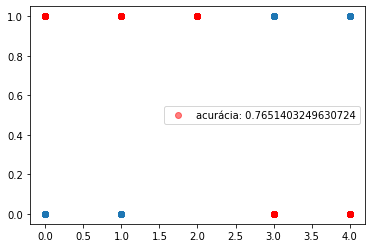

Intercept:  [0.79422697] 
Slope:  [[-0.03486417  0.3882235  -0.07443702 -0.26500832 -0.50710316 -0.21144182
  -7.18752521  7.90751745 -0.12105531 -0.51364775 -2.2810032  -4.74122294
  -0.15643238 -0.12447077 -0.05397622  0.          5.68271801  0.63979692
   0.99066443 -0.24897017 -0.41978355  0.07317222]] 
MSE:  0.048005908419497784 



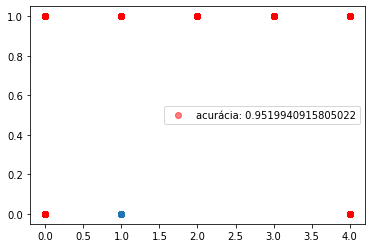

In [4]:
# característica que melhor distribui os valores
Xcol = np.array(X["ring-type"]).reshape(-1, 1)

modelo.fit(Xcol, y)
y_pred = modelo.predict(Xcol)
y_pred = (y_pred>0.5).astype(int)

plt.scatter(Xcol, y)
acuracia = accuracy_score(y, y_pred)
plt.plot(Xcol, y_pred, 'ro', label=f"acurácia: {acuracia}", alpha=0.5)
plt.legend()
plt.show()

modelo.fit(X, y)
y_pred = modelo.predict(X)
y_pred = (y_pred>0.5).astype(int)
mse = mean_squared_error(y, y_pred)

print('Intercept: ', modelo.intercept_, '\nSlope: ', modelo.coef_, '\nMSE: ', mse, '\n')

coeficientes = np.array(modelo.coef_[0]).copy()

plt.scatter(Xcol, y)
acuracia = accuracy_score(y, y_pred)
plt.plot(Xcol, y_pred, 'ro', label=f"acurácia: {acuracia}", alpha=0.5)
plt.legend()
plt.show()

In [9]:
def calcular_erro(intercept, coef, colIndex):
    modelo.intercept_ = intercept
    coefs = np.full(shape=(1,22), fill_value=0.0)    
    coefs[0][colIndex] = coef
    modelo.coef_ = coefs
    y_pred = modelo.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

Delta: +/-  3


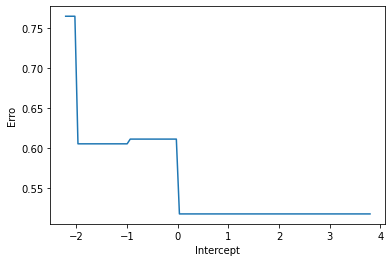

Delta: +/-  5


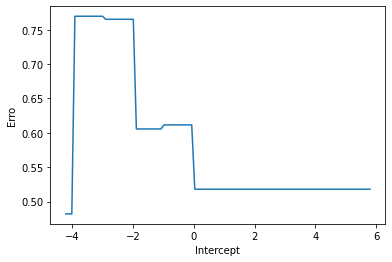

Delta: +/-  10


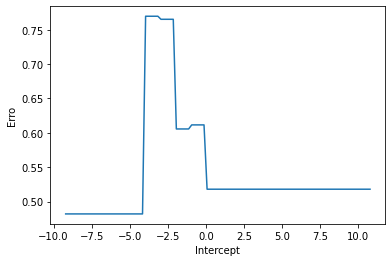

In [10]:
deltas = [3, 5, 10]
# como o Intercept ficou aproxamadamente em 0.79, fui testando um valor até achar os deltas de +/- 3, 5 e 10
for delta in deltas:
    print('Delta: +/- ', delta)

    delta_intercept = np.linspace(0.79422697+delta*-1, 0.79422697+delta, 100)

    # Criação da matriz de Erros baseado em MSE
    Erro = np.array([[calcular_erro(delta_intercept[k], coeficientes[j], j) for k in range(delta_intercept.shape[0])] for j in range(coeficientes.shape[0])])

    plt.ylabel("Erro")
    plt.xlabel("Intercept")
    i=18
    Delta_intercept, _ = np.meshgrid(delta_intercept, coeficientes)
    plt.plot(Delta_intercept[i,:], Erro[i,:])
    plt.show()